In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load

# Read the City Data
city_data = pd.read_csv("data/city_data.csv")
city_data.head()



,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
# Read the Ride Data
ride_data = pd.read_csv("data/ride_data.csv")
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset
city_ride_df = pd.merge(ride_data, city_data, how="left", on=["city"])
                                                        
city_ride_df.head()

# Display the data table for preview

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [4]:
city_grouped = city_ride_df.groupby('city').agg({'fare': 'mean', 'ride_id': 'nunique', 'driver_count': 'first', 'type': 'first'})
city_grouped.head()

,fare,ride_id,driver_count,type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


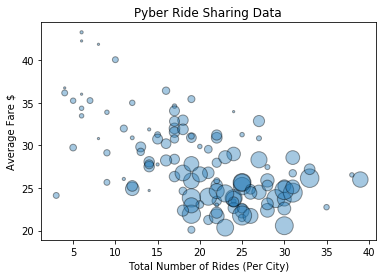

In [5]:
plt.scatter(city_grouped["ride_id"], city_grouped["fare"], city_grouped["driver_count"]*5, alpha=.4, edgecolor="black")



plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare $")
plt.show()

Urban
Suburban
Rural


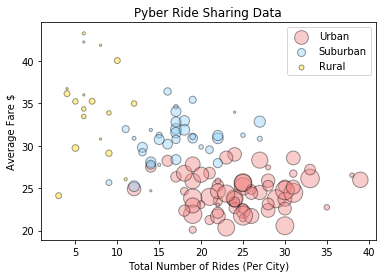

In [6]:
cipher = {'Urban':'lightcoral', 'Suburban': 'lightskyblue', 'Rural':'gold'}

for x in cipher.keys():
    print (x)
    mask=city_grouped[city_grouped["type"]==x]
    plt.scatter(mask["ride_id"], mask["fare"], mask["driver_count"]*5, c=cipher[x], alpha=.4, edgecolor="black", label=x)

#plt.scatter(city_grouped["ride_id"], city_grouped["fare"], city_grouped["driver_count"]*5, alpha=.4, edgecolor="black")


plt.legend()
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare $")
plt.show()

('Urban', 'lightcoral')
('Suburban', 'lightskyblue')
('Rural', 'gold')


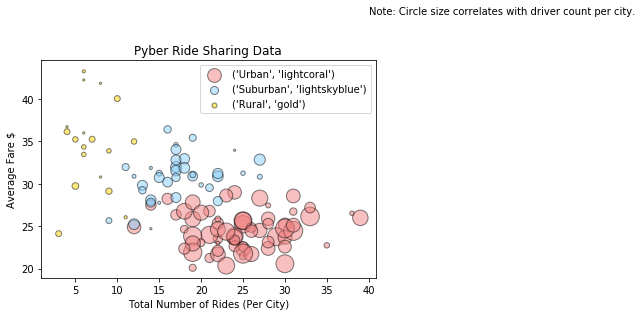

In [7]:
cipher = {'Urban':'lightcoral', 'Suburban': 'lightskyblue', 'Rural':'gold'}

for x in cipher.items():
    print (x)
    mask=city_grouped[city_grouped["type"]==x[0]]
    plt.scatter(mask["ride_id"], mask["fare"], mask["driver_count"]*5, c=x[1], alpha=.5, edgecolor="black", label=x)

#plt.scatter(city_grouped["ride_id"], city_grouped["fare"], city_grouped["driver_count"]*5, alpha=.4, edgecolor="black")


plt.legend()
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare $")
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")
plt.show()

In [8]:
cipher.items()

dict_items([('Urban', 'lightcoral'), ('Suburban', 'lightskyblue'), ('Rural', 'gold')])

* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.

In [9]:
# Obtain the x and y coordinates for each of the three city types (Urban, Rural, Suburban)
#df = pd.DataFrame(
        #data, 
        #columns=['a','b','c','d','e'])
    
#df.head()
Urban
x_axis = np.arange(len(city_data))
tick_locations = [value for value in x_axis]

plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black")

NameError: name 'Urban' is not defined

No handles with labels found to put in legend.


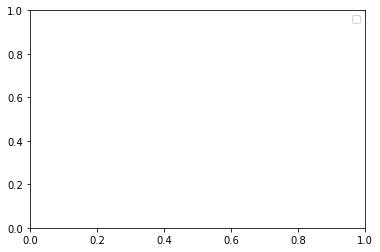

In [10]:

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend
plt.legend(loc="best")
# Incorporate a text label regarding circle size

# Save Figure

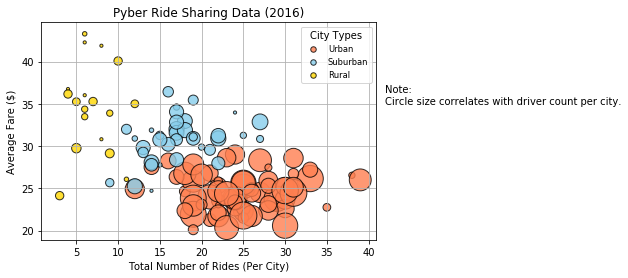

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [11]:
# Calculate Type Percents
city_fare = city_ride_df.groupby(["type"])["fare"].sum()
city_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

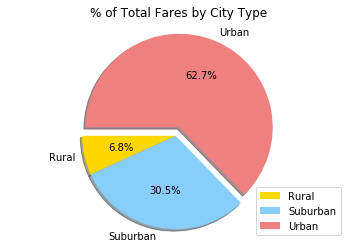

In [12]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

#Create the pie chart.
explode = (0, 0, 0.1)
plt.pie(city_fare, labels = city_fare.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 180)
plt.axis("equal")
plt.legend(loc = "lower right")
plt.title("% of Total Fares by City Type")
#Show the chart.
plt.show()

## Total Rides by City Type

In [13]:
# Calculate Ride Percents
rides_by_city = city_ride_df.groupby(["type"])["ride_id"].count()
rides_by_city
# Build Pie Chart

# Save Figure


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

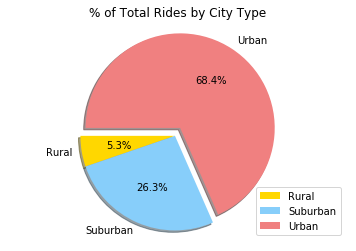

In [14]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

#Create the pie chart.
explode = (0, 0, 0.1)
plt.pie(rides_by_city, labels = rides_by_city.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 180)
plt.axis("equal")
plt.legend(loc = "lower right")
plt.title("% of Total Rides by City Type")
#Show the chart.
plt.show()

## Total Drivers by City Type

In [15]:
# Calculate Driver Percents
rides_by_driver = city_ride_df.groupby(["type"])["driver_count"].mean()
rides_by_driver
# Build Pie Charts

# Save Figure


type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [16]:
# Show Figure
plt.show()

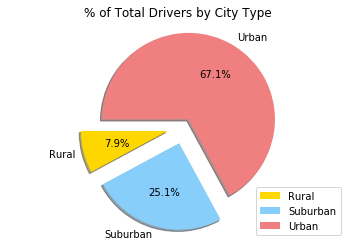

In [17]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

#Create the pie chart.
explode = (0.2, 0.2, 0.1)
plt.pie(rides_by_driver, labels = rides_by_driver.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 180)
plt.axis("equal")
plt.legend(loc = "lower right")
plt.title("% of Total Drivers by City Type")
#Show the chart.
plt.show()